In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import ast

# Load your dataset (CSV or Excel)
df = pd.read_excel("/content/drive/MyDrive/ML_End_Sem/Telugu/ML_Models_LASER/telugu_reviews_with_laser.xlsx")  # or pd.read_excel("your_file.xlsx")

# Convert string embeddings to actual lists
df['embeddings'] = df['embeddings'].apply(ast.literal_eval)

# Expand the list into separate columns
embeddings_df = pd.DataFrame(df['embeddings'].tolist())
embeddings_df.columns = [f'emb_{i}' for i in range(embeddings_df.shape[1])]

# Concatenate with the original dataframe (excluding original embeddings column)
df_expanded = pd.concat([df.drop(columns=['embeddings']), embeddings_df], axis=1)

# Save to Excel
df_expanded.to_excel("/content/drive/MyDrive/ML_End_Sem/English/ML_Models_LASER/telugu_reviews_with_laser.xlsx", index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML_End_Sem/English/ML_Models_LASER/telugu_reviews_with_laser.xlsx'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/ML_End_Sem/Telugu/ML_Models_LASER/telugu_reviews_with_laser.xlsx")



=== Dataset Sanity Checks ===
Total Reviews: 4399
Class Distribution (Before Downsampling):
label
0    0.666742
1    0.333258
Name: proportion, dtype: float64

Average Text Length:
label
0     9.061712
1    10.855389
Name: text_length, dtype: float64

Number of Duplicates: 1403

Class Distribution (After Downsampling):
label
1    0.5
0    0.5
Name: proportion, dtype: float64


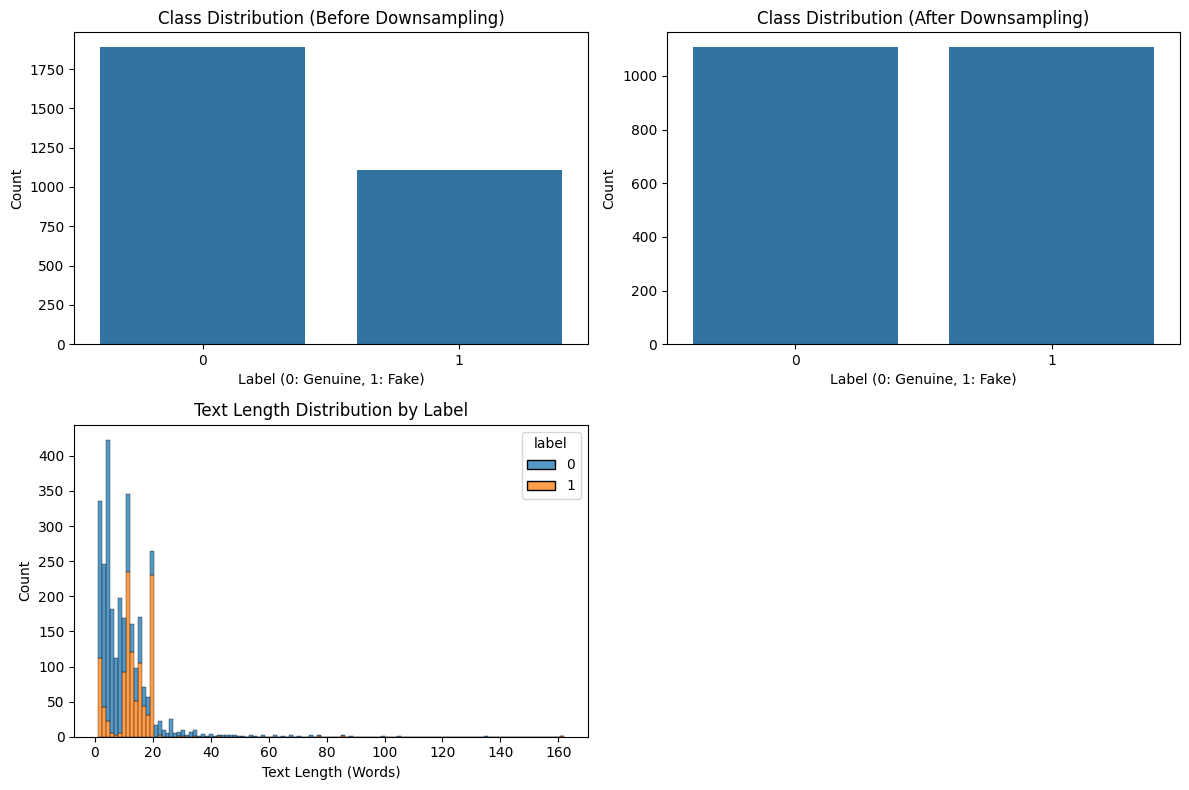

In [ ]:
# Data Sanity Checks
print("=== Dataset Sanity Checks ===")
print("Total Reviews:", len(df))
print("Class Distribution (Before Downsampling):")
print(df['label'].value_counts(normalize=True))

# Text Length Analysis
df['text_length'] = df['comment'].apply(lambda x: len(str(x).split()))
print("\nAverage Text Length:")
print(df.groupby('label')['text_length'].mean())

# Duplicate Check
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)
df = df.drop_duplicates()

# Downsampling
# Separate majority and minority classes
df_majority = df[df['label'] == 0]  # Genuine
df_minority = df[df['label'] == 1]  # Fake

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=len(df_minority),
                                  random_state=42)

# Combine minority and downsampled majority
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Save balanced dataset
df_balanced.to_excel("telugu_fasttext_balanced.xlsx", index=False)

# Class Distribution After Downsampling
print("\nClass Distribution (After Downsampling):")
print(df_balanced['label'].value_counts(normalize=True))

# Visualizations
plt.figure(figsize=(12, 8))

# Class Distribution Before Downsampling
plt.subplot(2, 2, 1)
sns.countplot(x='label', data=df)
plt.title("Class Distribution (Before Downsampling)")
plt.xlabel("Label (0: Genuine, 1: Fake)")
plt.ylabel("Count")

# Class Distribution After Downsampling
plt.subplot(2, 2, 2)
sns.countplot(x='label', data=df_balanced)
plt.title("Class Distribution (After Downsampling)")
plt.xlabel("Label (0: Genuine, 1: Fake)")
plt.ylabel("Count")

# Text Length Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='text_length', hue='label', multiple='stack')
plt.title("Text Length Distribution by Label")
plt.xlabel("Text Length (Words)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("data_sanity_plots.png")
plt.show()

# Save Sanity Check Summary
sanity_summary = {
    "Total Reviews": len(df),
    "Fake (%)": df['label'].mean() * 100,
    "Genuine (%)": (1 - df['label'].mean()) * 100,
    "Avg Text Length (Fake)": df[df['label'] == 1]['text_length'].mean(),
    "Avg Text Length (Genuine)": df[df['label'] == 0]['text_length'].mean(),
    "Duplicates Removed": duplicates,
    "Balanced Fake (%)": df_balanced['label'].mean() * 100,
    "Balanced Genuine (%)": (1 - df_balanced['label'].mean()) * 100
}
pd.DataFrame([sanity_summary]).to_csv("sanity_summary.csv", index=False)

Import data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load balanced dataset
df = pd.read_excel("/content/telugu_fasttext_balanced.xlsx")

# Features and labels
X = df[[f'emb_{i}' for i in range(1023)]]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results storage
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}


KNN


=== KNN ===
Train Accuracy: 0.935064935064935
Test Accuracy: 0.9209932279909706
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       223
           1       0.92      0.92      0.92       220

    accuracy                           0.92       443
   macro avg       0.92      0.92      0.92       443
weighted avg       0.92      0.92      0.92       443

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       884
           1       0.94      0.93      0.94       887

    accuracy                           0.94      1771
   macro avg       0.94      0.94      0.94      1771
weighted avg       0.94      0.94      0.94      1771



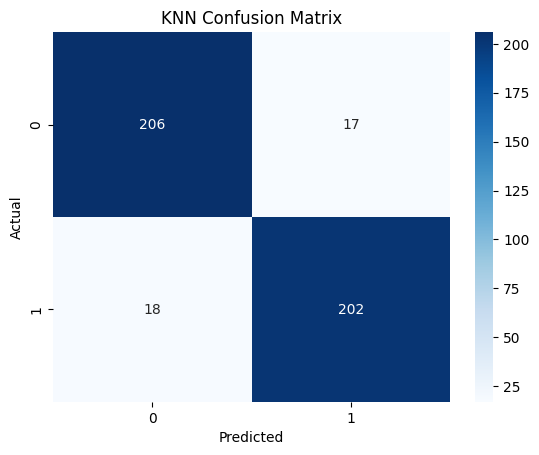

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('KNN')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== KNN ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN_hyperparameter_tunning



=== KNN (Tuned) ===
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Train Accuracy: 1.0
Test Accuracy: 0.9255079006772009

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       223
           1       0.93      0.91      0.92       220

    accuracy                           0.93       443
   macro avg       0.93      0.93      0.93       443
weighted avg       0.93      0.93      0.93       443


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



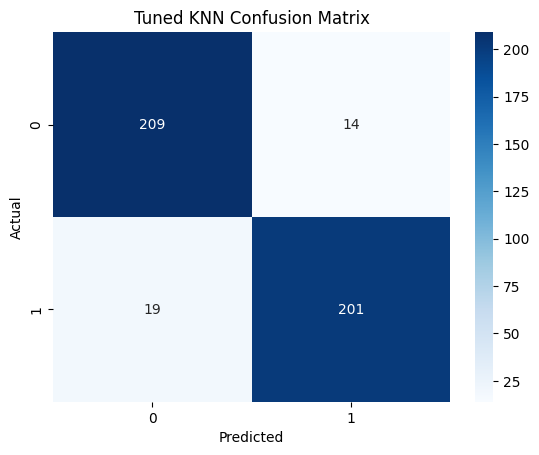

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': list(range(1, 21)),   # Try 1 to 20 neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('KNN')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

# Output
print("\n=== KNN (Tuned) ===")
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Tuned KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XG_Boost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:51:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Train Accuracy: 1.0
Test Accuracy: 0.9029345372460497
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       223
           1       0.92      0.88      0.90       220

    accuracy                           0.90       443
   macro avg       0.90      0.90      0.90       443
weighted avg       0.90      0.90      0.90       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



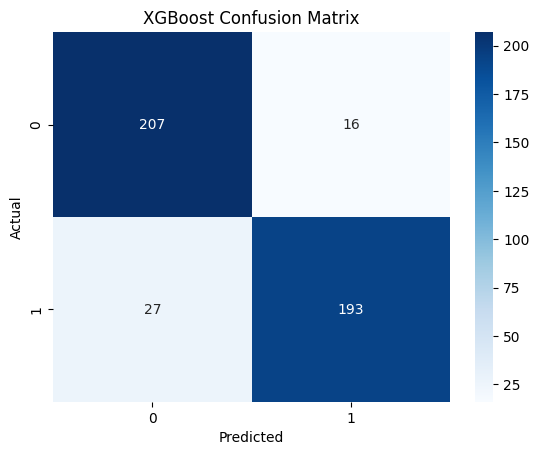

In [14]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('XGBoost')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== XGBoost ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XG_boost_hyperparameter_tunning


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Setup model and grid search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Predict
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('XGBoost (Tuned)')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

# Output
print("\n=== XGBoost (Tuned) ===")
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Tuned XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest


=== Random Forest ===
Train Accuracy: 1.0
Test Accuracy: 0.8961625282167043
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       223
           1       0.91      0.87      0.89       220

    accuracy                           0.90       443
   macro avg       0.90      0.90      0.90       443
weighted avg       0.90      0.90      0.90       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



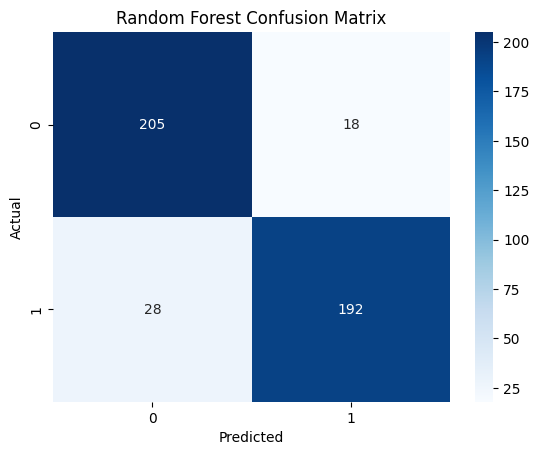

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Random Forest')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Random Forest ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree


=== Decision Tree ===
Train Accuracy: 1.0
Test Accuracy: 0.8487584650112867
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       223
           1       0.84      0.85      0.85       220

    accuracy                           0.85       443
   macro avg       0.85      0.85      0.85       443
weighted avg       0.85      0.85      0.85       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



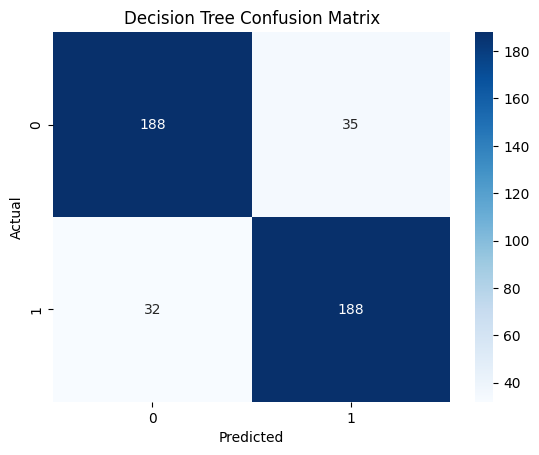

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Decision Tree')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Decision Tree ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))


sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


MLP


=== MLP ===
Train Accuracy: 1.0
Test Accuracy: 0.909706546275395
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       223
           1       0.92      0.90      0.91       220

    accuracy                           0.91       443
   macro avg       0.91      0.91      0.91       443
weighted avg       0.91      0.91      0.91       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



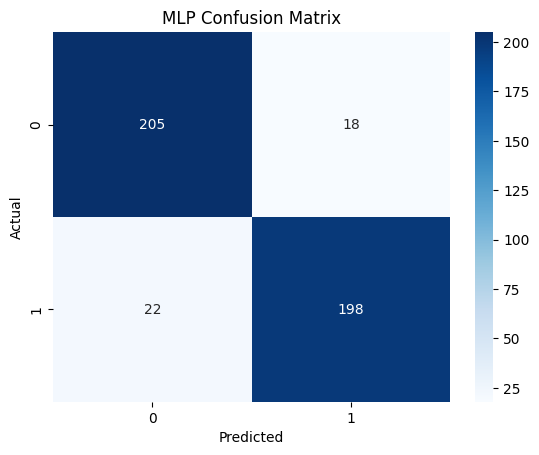

In [18]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('MLP')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== MLP ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))


sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM


=== SVM ===
Train Accuracy: 0.955957086391869
Test Accuracy: 0.909706546275395
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       223
           1       0.93      0.88      0.91       220

    accuracy                           0.91       443
   macro avg       0.91      0.91      0.91       443
weighted avg       0.91      0.91      0.91       443

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       884
           1       0.98      0.93      0.95       887

    accuracy                           0.96      1771
   macro avg       0.96      0.96      0.96      1771
weighted avg       0.96      0.96      0.96      1771



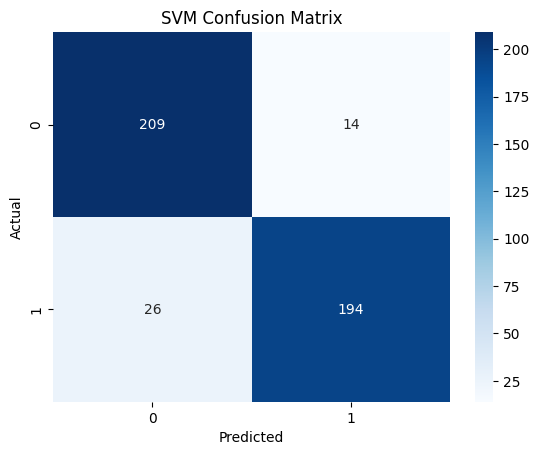

In [19]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('SVM')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== SVM ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes


=== Naive Bayes ===
Train Accuracy: 0.8735177865612648
Test Accuracy: 0.835214446952596
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       223
           1       0.86      0.80      0.83       220

    accuracy                           0.84       443
   macro avg       0.84      0.83      0.83       443
weighted avg       0.84      0.84      0.83       443

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       884
           1       0.90      0.84      0.87       887

    accuracy                           0.87      1771
   macro avg       0.87      0.87      0.87      1771
weighted avg       0.88      0.87      0.87      1771



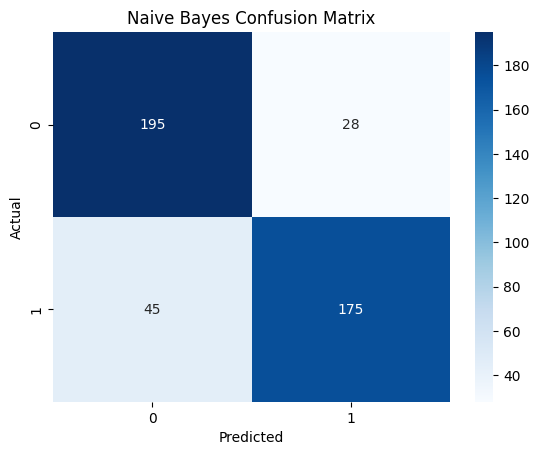

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Naive Bayes')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Naive Bayes ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Satcking Model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


=== Stacking Classifier ===
Train Accuracy: 1.0
Test Accuracy: 0.9232505643340858
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       223
           1       0.93      0.91      0.92       220

    accuracy                           0.92       443
   macro avg       0.92      0.92      0.92       443
weighted avg       0.92      0.92      0.92       443

Train Accuracy: 0.9232505643340858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



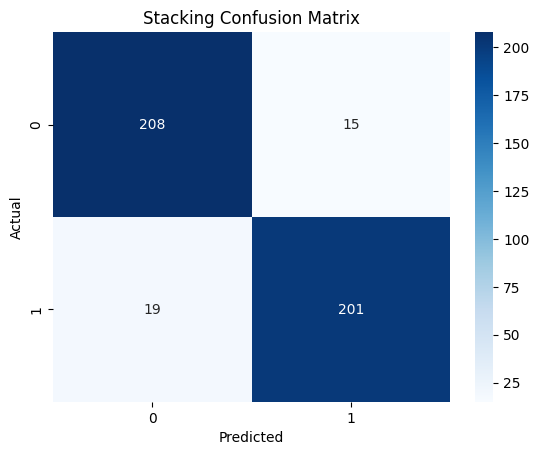

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models again
base_models = [
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('NB', GaussianNB())
]

model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Stacking')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Stacking Classifier ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))

print("Train Accuracy:", test_acc)
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Stacking Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Final Accuracy Comparison Plot (Run After All Models)

           Model  Train Accuracy  Test Accuracy
0            KNN        0.935065       0.920993
2        XGBoost        1.000000       0.902935
3  Random Forest        1.000000       0.896163
4  Decision Tree        1.000000       0.848758
5            MLP        1.000000       0.909707
6            SVM        0.955957       0.909707
7    Naive Bayes        0.873518       0.835214
8       Stacking        1.000000       0.923251


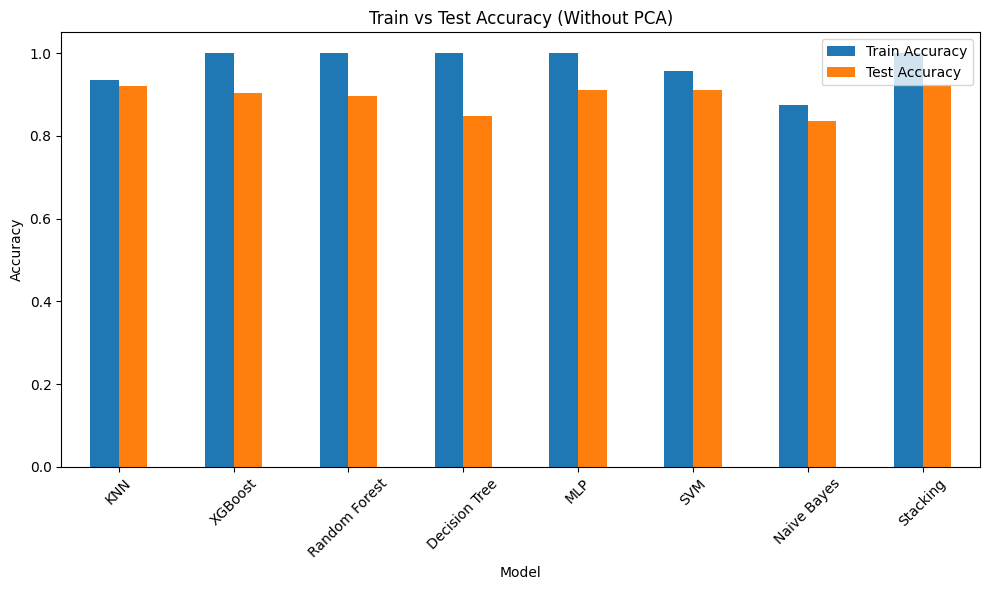

In [22]:
results_df = pd.DataFrame(results)
results_df = results_df.drop_duplicates(subset='Model')  # Drop duplicate models
print(results_df)

results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title("Train vs Test Accuracy (Without PCA)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_comparison_without_pca.png")
plt.show()

# Save results
results_df.to_csv("model_results_without_pca.csv", index=False)
